# Load Data

In [2]:
# import into data frame
import pandas as pd
churn = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
df = pd.read_csv(churn, index_col=0)

df_churn_yes = df[df["Churn"]=="Yes"]
df_churn_no = df[df["Churn"]=="No"]

numeric_columns_array = [
                 "Income", 
                 "Tenure", 
                 "Outage_sec_perweek", 
                 "MonthlyCharge", 
                 "Bandwidth_GB_Year",
                 "Population",
                 "Children",
                 "Age",
                 "Yearly_equip_failure",
                 "Email",
                 "Contacts"
                 ]

# 2-Sample T-Test

H0: SampleMean1 == SampleMean2

H1: SampleMean1 == SampleMean2



Income
Ttest_indResult(statistic=0.5936894196669502, pvalue=0.552733291902922)
Churn_YES_Mean ( 40085.76 ) == ( 39706.40 ) Churn_NO_Mean


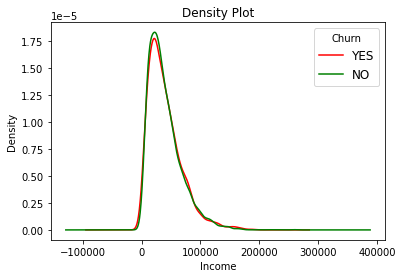



Tenure
Ttest_indResult(statistic=-55.52487046681211, pvalue=0.0)
Churn_YES_Mean ( 13.15 ) != ( 42.23 ) Churn_NO_Mean


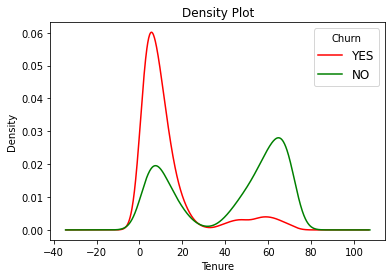



Outage_sec_perweek
Ttest_indResult(statistic=-0.015639241921385327, pvalue=0.98752251103374)
Churn_YES_Mean ( 10.00 ) == ( 10.00 ) Churn_NO_Mean


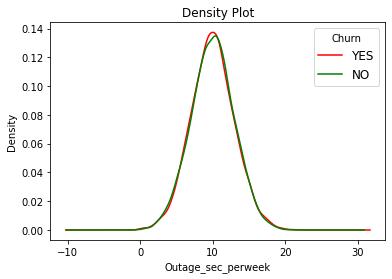



MonthlyCharge
Ttest_indResult(statistic=40.189476722374266, pvalue=0.0)
Churn_YES_Mean ( 199.30 ) != ( 163.01 ) Churn_NO_Mean


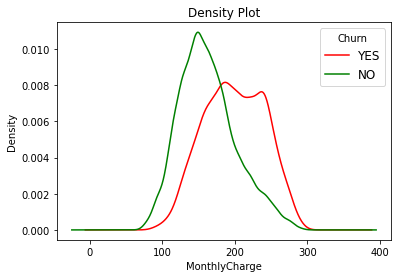



Bandwidth_GB_Year
Ttest_indResult(statistic=-49.22372261953203, pvalue=0.0)
Churn_YES_Mean ( 1785.01 ) != ( 3971.86 ) Churn_NO_Mean


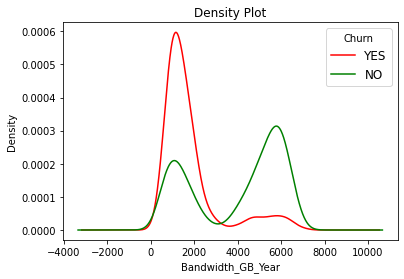



Population
Ttest_indResult(statistic=-0.8532835320931161, pvalue=0.3935225316866866)
Churn_YES_Mean ( 9551.46 ) == ( 9830.51 ) Churn_NO_Mean


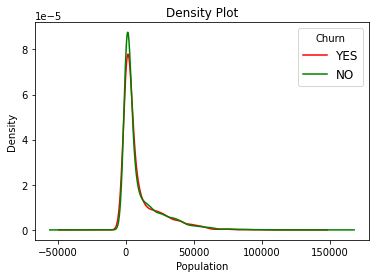



Children
Ttest_indResult(statistic=-0.426361661528078, pvalue=0.6698535122610998)
Churn_YES_Mean ( 2.07 ) == ( 2.09 ) Churn_NO_Mean


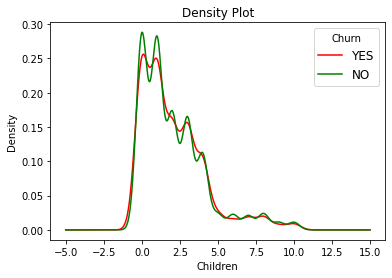



Age
Ttest_indResult(statistic=0.562908145383722, pvalue=0.573510055486891)
Churn_YES_Mean ( 53.27 ) == ( 53.01 ) Churn_NO_Mean


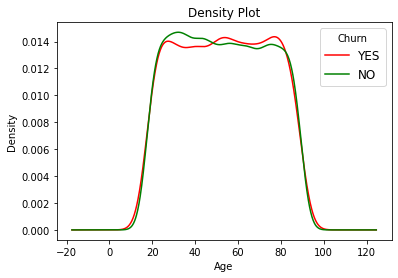



Yearly_equip_failure
Ttest_indResult(statistic=-1.592755629337239, pvalue=0.11124663475844035)
Churn_YES_Mean ( 0.38 ) == ( 0.40 ) Churn_NO_Mean


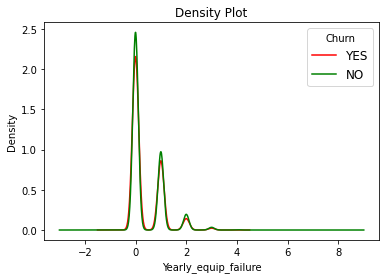



Email
Ttest_indResult(statistic=1.2325944156039008, pvalue=0.21775610450205743)
Churn_YES_Mean ( 12.08 ) == ( 11.99 ) Churn_NO_Mean


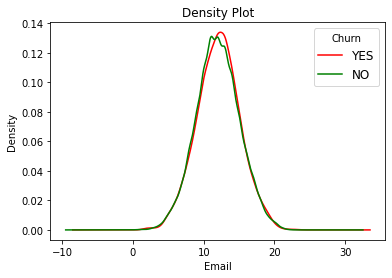



Contacts
Ttest_indResult(statistic=0.8566219322168955, pvalue=0.3916743913251065)
Churn_YES_Mean ( 1.01 ) == ( 0.99 ) Churn_NO_Mean


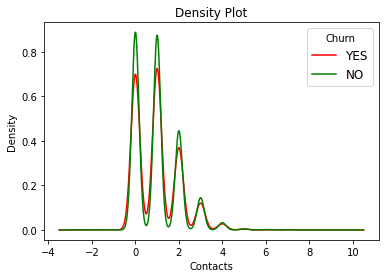


SUMMARY: 
Difference exists inside these features
{
    "Tenure": [
        -55.52487046681211,
        0.0
    ],
    "Bandwidth_GB_Year": [
        -49.22372261953203,
        0.0
    ],
    "MonthlyCharge": [
        40.189476722374266,
        0.0
    ]
}


In [18]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

myDictionaty = dict()
for column_name in numeric_columns_array:
  print("\n")
  print(column_name)
  
  sample1 = df_churn_yes[column_name]
  sample2 = df_churn_no[column_name]
  testResult = stats.ttest_ind(sample1, sample2)
  print(testResult)

  statistic, pvalue = testResult
  alpha = 0.05
  #P-value is the probability of H0 being true
  if pvalue <= alpha:
    h0 = False #Reject H0
  else:
    h0 = True #Accept H0

  mean1 = "{:.2f}".format(np.mean(sample1))
  mean2 = "{:.2f}".format(np.mean(sample2))

  if(h0):
    print("Churn_YES_Mean (",mean1,") == (",mean2,") Churn_NO_Mean")
  else:
    print("Churn_YES_Mean (",mean1,") != (",mean2,") Churn_NO_Mean")
    key = column_name
    myDictionaty[key] = testResult

  # Plot density graph 
  # Draw the density plot
  sample1.plot.density(color='red', label="YES")
  sample2.plot.density(color='green', label="NO")
    
  # Plot formatting
  plt.legend(prop={'size': 12}, title = 'Churn')
  plt.title('Density Plot')
  plt.xlabel(column_name)
  plt.ylabel('Density')
  plt.show()

print("\nSUMMARY: \nDifference exists inside these features")
myDictionaty_sorted = dict(sorted(myDictionaty.items(), key=lambda item: item[1]))
# Print dictionary as json format
import json
print(json.dumps(myDictionaty_sorted, indent=4))

# Insigts

- Low **Tenure**: churn clients median stay is 7 months, while non-churn stay for 53 months

- High **MonthlyCharge**: churn clients pay in avg `$`199.29, while non-churn pay `$`163.00

- Low **Bandwidth_GB_Year**: churn clients median use is 1,357.83 GB per year, while non-churn use is 4,895.17 GB per year.

*If data is skewed, MEDIAN is usually better to use *italicized text*